# Detecção de faces e objetos

## Teoria

**Classificador cascade**

- Precisamos de dois conjuntos de dados, um com imagens positivas e outro com negativas, no caso de deteccção de faces, seria um com faces e outro com não faces

- Selecionamos as catacteristicas atraves do AdaBoost

- aplicamos a seleção de caracteristicas para cada subjanela de uma imagem, com o objetivo de achar uma subjanela que se encaixe nas caracteristicas, sendo ela uma face

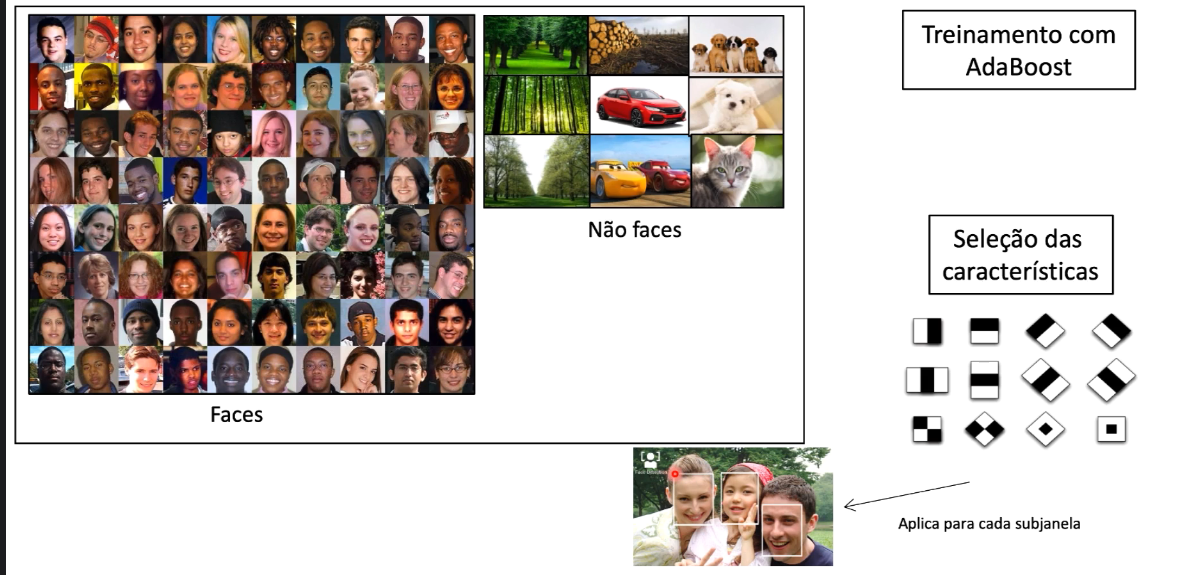

- a matriz é calculada pela formula



```
SOma pixels brancos - Soma pixels preto
```
- Vamos colocando as caracteristicas em cima da imagem, e depois somamos os pixels que eles possuem
- sendo que cada caracteristica tem pixels brancos e pretos



## Implementação

In [38]:
import cv2 # OpenCV
from google.colab.patches import cv2_imshow

In [39]:
imagem = cv2.imread('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Imagens/workplace-1245776_1920.jpg')

In [40]:
cv2_imshow(imagem)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
# é um arquivo JA TREINADO para detecção de faces
detector_face = cv2.CascadeClassifier('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Cascades OpenCV/haarcascade_frontalface_default.xml')

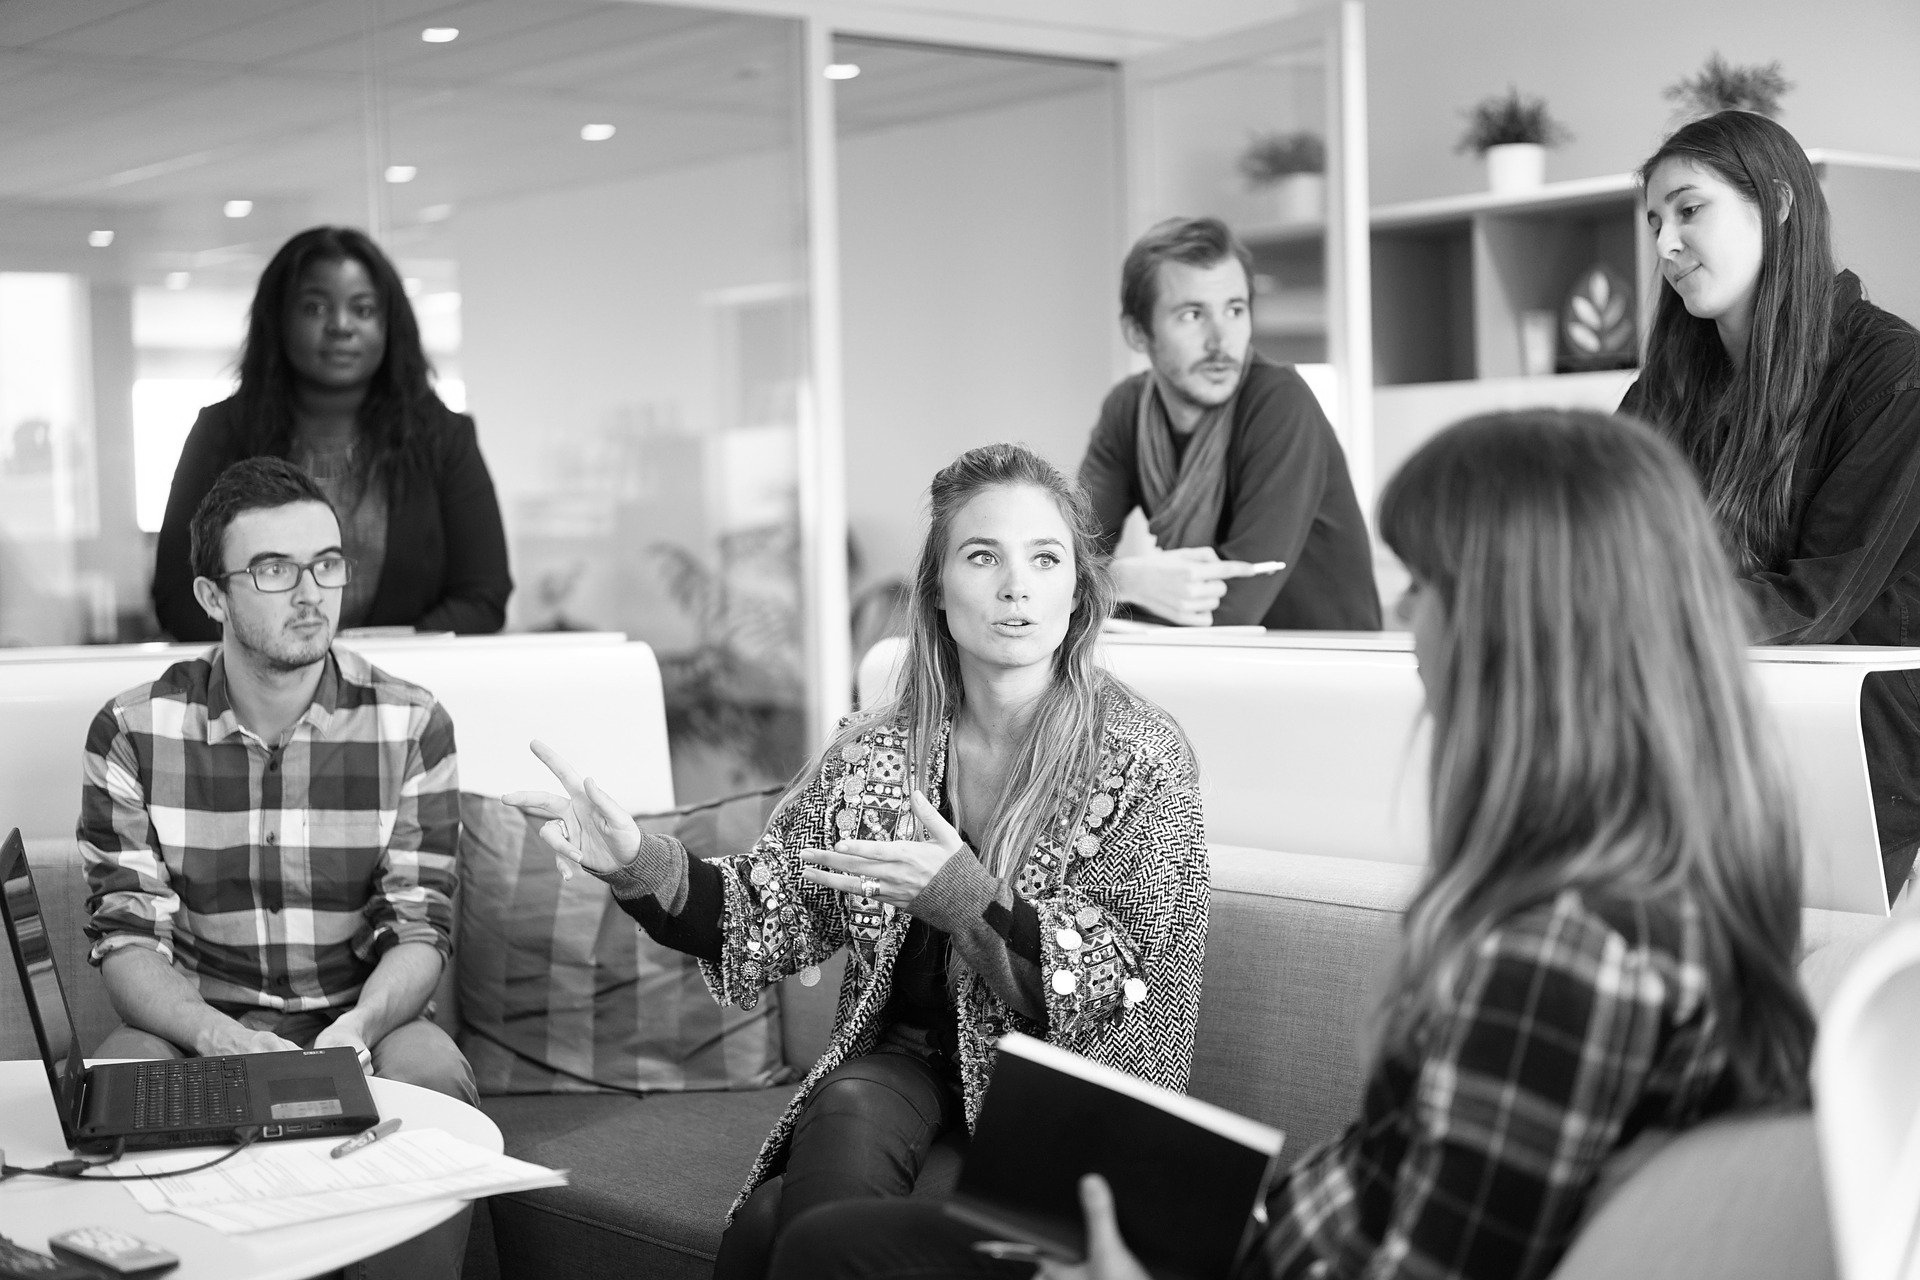

In [42]:
# Precisamos converter para escala de cinza, para demorar menos tempo por causa dos canais de cor
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [43]:
# Vamos aplicar o classificador nessa imagem
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize = (30,30))# Scale factor é como se tivesse dando um zoom na imagem, uma vez que os falsos positivos foram pequenos
# minSize é o tamanho minimo de uma face detectada, como a imagem tem faces grandes, podemos deixar esse valor maior

In [44]:
deteccoes # As duas primeiras colunas são X, Y. As duas ultimas são o tamanho da face

array([[1635,  156,  147,  147],
       [ 284,  262,  114,  114],
       [1149,  260,  129,  129],
       [ 928,  491,  171,  171],
       [ 222,  507,  151,  151]], dtype=int32)

In [45]:
len(deteccoes)# 7 posições

5

ele identificou 7 faces

In [46]:
# Estamos colocando um retangulo que indica onde estão as faces encontradas na nossa imagem normal
for (x, y, l, a) in deteccoes: # l = largura a = altura
  cv2.rectangle(imagem, (x,y), (x+l, y+a), (0,255,0), 2) # Vamos desenhar as faces detectadas na imagem normal, pois nao estamos detectando, apenas mostrando

cv2_imshow(imagem)

Output hidden; open in https://colab.research.google.com to view.

Nesse caso tivemos 2 falsos pisitivos, entao vamos alterar os parametros das detecções

## Exercicio

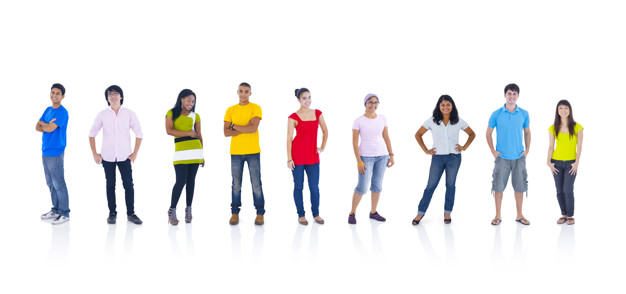

In [137]:
# Importando a imagem
imagem = cv2.imread('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Imagens/pessoas.jpg')
cv2_imshow(imagem) # Seve para mostrar a imagem real, a partir a imagem em forma de matriz pixels

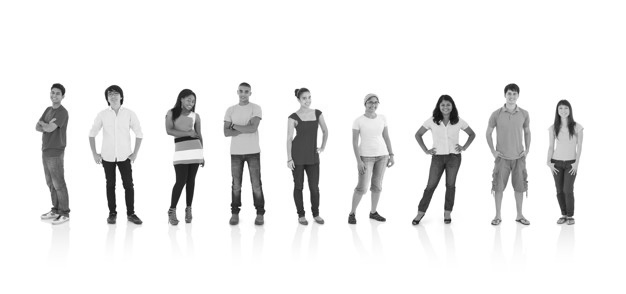

In [80]:
# Deixando imagem cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [81]:
# Carregando o modelo ja treinado
detector_face = cv2.CascadeClassifier('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Cascades OpenCV/fullbody.xml')

In [82]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.1)
len(deteccoes)

9

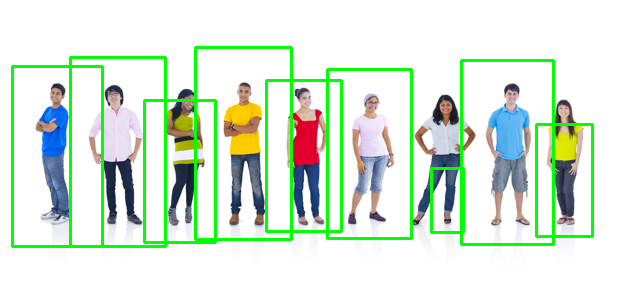

In [83]:
for (x, y, l, a) in deteccoes:
  cv2.rectangle(imagem, (x,y), (x+l, y+a), (0,255,0), 2)
cv2_imshow(imagem)

Geralmente ja existem modelos Cascades ja treinados para serem usados nas aplicações

# Reconhecimento facial

## Teoria

- LBPH(local binary patterns histograms)
- cada imagem é reprezentada por uma matrioz com os valores de cor para cada pixel



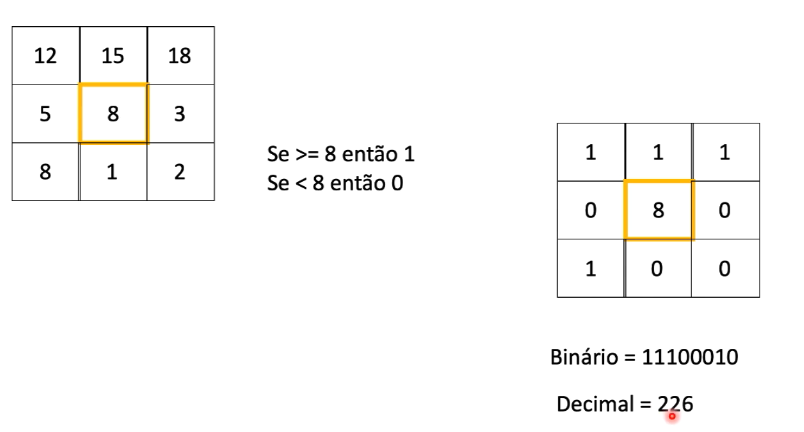

- A partir do valor central, faremos regras que converterão os valores das bordas para binario, tendo assim o valor da imagem
- é robusto para variações de luz, uma vez que vai aumentar a luminosidade proporcionalmente, logo, da mesma forma que os valores mudam, a regra tambem muda

**Exemplo real**



```
- cada "quadradinho" é um conjunto de pixels

- com esse conjunto de pixels geramos um histograma com as cores de cada um dos pixels

- com os histogramas podemos fazer a identificação da imagem, podendo descobrir se é borda, canto ou se faz parte da imagem e  outras analises
```



## Implementação

Treinamento

In [87]:
!pip install pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
import PIL.Image # Para trabalhare com leitura de imagens
import numpy as np

In [90]:
import zipfile
path = '/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/yalefaces.zip'
zip_obj = zipfile.ZipFile(file=path, mode='r')
zip_obj.extractall('./')
zip_obj.close()

- precisamos criar um padrao para conseguir enviar para o treinamento, variavel com ID da pessoa e variavel com imagens no formato do numpy(matriz com os dados)
- Nesse caso cada imagem tera cerca de 77000 pixels

In [93]:
import os
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')] # Vai juntar o caminho da pasta e os nomes dos arquivos
  faces = []
  ids = []
  for caminho in caminhos:
    # Pegando as imagens na padronização
    imagem = PIL.Image.open(caminho).convert('L') # Converter para cinza
    imagem_np = np.array(imagem, 'uint8') # Converter a imagem para uma matriz de numeros inteiros
    faces.append(imagem_np)

    # Pegando os ides na padronização
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', '')) # Vai tirar o texto 'subject', pegando somente os ids das imagens
    ids.append(id)

  return np.array(ids), faces

In [94]:
ids, faces = dados_imagem()

In [97]:
print(ids)

[10 14 10  9 14  6  3 11  3  9  1 14 14 12  3  2  6  4 14  5  4  7  4  1
  6  2 12  5 13  4 15  1  8 13  3  7 11  2 12  4  7 12  9  1  3  1 14  6
  9 12 11 13  3  8  8  7 10 15  5 12  9  6 14  9  6 11  7 14  9  4 15  8
  1  2  2  1  8  5  5 12  8  5 13 15  2 10 14  8 11 13 15  9 10  3  4 12
  5  5  6  9 12  7  4 10  7  2 15 13 10  6 15  3 11 15 13  2  2  6  7  7
 10 11  1 15  8 11  4 13 11  8  5 10  1 13  3]


In [98]:
faces[0] # Matriz da primeria face encontrada

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 244, 255, 255],
       [255, 255, 255, ..., 238, 242, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [99]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml') # Nosso classificador treinado

**Classificação**

In [107]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml') # Carregando o classificador

In [132]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [133]:
imagem = PIL.Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [129]:
id_previsto, _ = reconhecedor.predict(imagem_np)
id_previsto

10

Acertou na previsao

In [134]:
id_correto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
id_correto


10

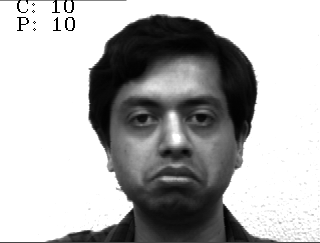

In [135]:
cv2.putText(imagem_np, f'P: {str(id_previsto)}', (15,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(imagem_np, f'C: {str(id_correto)}', (15, 12), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(imagem_np) # Mostra  a matriz em forma de imagem real

# Rastreamento de objetos

## Teoria


- mais rapidos que oa algoritmos de detecção
- algoritmo de detecção sempre começa do zero, olhando toda a imagem
- rastreamento usa informação anterior, verificando as similaredades e possiveis direções
- ajuda a detectar faces parcialmente tampatas por mao, carros, etc, ..


**Algoritmo CSRT**





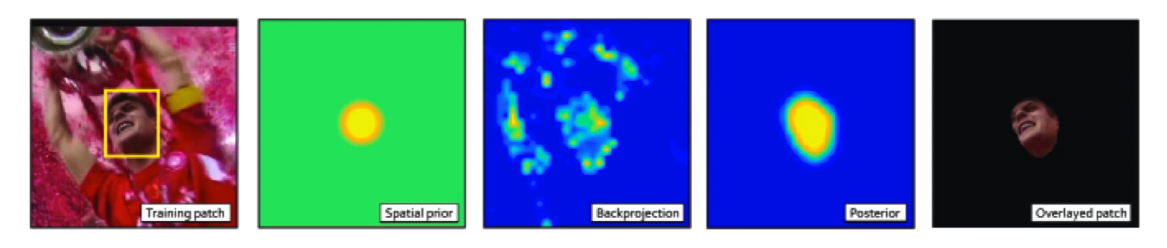



```
1. path de treinamento com a caixa delimiradora do objeto a ser rastreado
2. HOG para extrair informação util da imagem(usa histograma para detectar objetos)
3. Probabilidade de objeto posterior apos o teste aleatorio de Markov
4. Path de treinamento mascarado com o mapa final de confiabilidade
```

